In [0]:
import matplotlib
# matplotlib.use("agg")
import matplotlib.pyplot as plt
import itertools
import functools
import numpy as np
import pylab
from sklearn.metrics import mean_squared_error

def plot(X_train, y_train, X_true, y_true):
    plt.scatter(X_train, y_train, label='train data')
    plt.plot(X_true, y_true, c='g', label='ground truth')
    plt.title('Figure 1.2')
    plt.ylabel('Y axis ')
    plt.xlabel('X axis')
    plt.legend()
    plt.show()

def genDummy(start, end, nums, std):
    X = np.linspace(start, end, nums)
    sinusoid = np.sin(X*2*np.pi)
    noise = np.random.normal(scale=std,size=nums)
    y = sinusoid+noise
    return X, y

def rmse(x, y):
    return np.sqrt(mean_squared_error(x, y))

class FeatureFormation():
    def __init__(self, degree=2):
        assert isinstance(degree, int)
        self.degree = degree

    def transform(self, x):
        if x.ndim == 1:
            x = x[:, None]
        x_t = x.transpose()
        features = [np.ones(len(x))]
        for degree in range(1, self.degree + 1):
            for items in itertools.combinations_with_replacement(x_t, degree):
                features.append(functools.reduce(lambda x, y: x * y, items))
        return np.asarray(features).transpose()
    
class LinearRegression():
    def fit(self, X, t):
        self.w = np.linalg.pinv(X)@t
        self.var = np.mean(np.square(X@self.w-t))

    def predict(self, X):
        y = X @ self.w
        return y
    
class RidgeRegression():
    def __init__(self, alpha):
        self.alpha = alpha

    def fit(self, X, t):
        eye = np.eye(np.size(X, 1))
        self.w = np.linalg.solve(self.alpha * eye + X.T @ X, X.T @ t)

    def predict(self, X):
        return X @ self.w

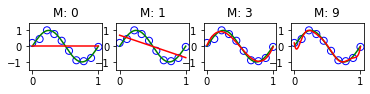

In [7]:
#from misc import *

x_train, y_train = genDummy(0, 1, 10, 0.1)
x_test = np.linspace(0, 1, 1000)
y_test = np.sin(2*np.pi*x_test)

#for i, degree in enumerate([0,1,3,9]):
for i, degree in enumerate([0, 1, 3, 9]):
    plt.subplot(4, 4, i+1)
    feature = FeatureFormation(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    
    plt.title("M: "+str(degree))
    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, c="g", label="$\sin(2\pi x)$")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.ylim(-1.5, 1.5)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))
plt.show()